In [25]:
# Install TensorFlow if not already
!pip install tensorflow

# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [26]:
# Function to load and process image
def load_image(image_url, max_dim=512):
    path = tf.keras.utils.get_file(origin=image_url)
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [27]:
# Function to display image
def show_image(image, title=''):
    if len(image.shape) == 4:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [28]:
# ✅ Working image URLs
content_url = "https://upload.wikimedia.org/wikipedia/commons/9/99/Black_square.jpg"
style_url = "https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg"


In [29]:
# Load images
content_image = load_image(content_url)
style_image = load_image(style_url)


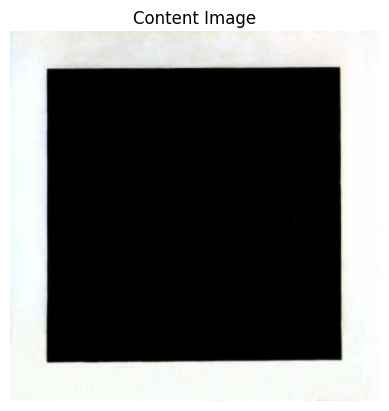

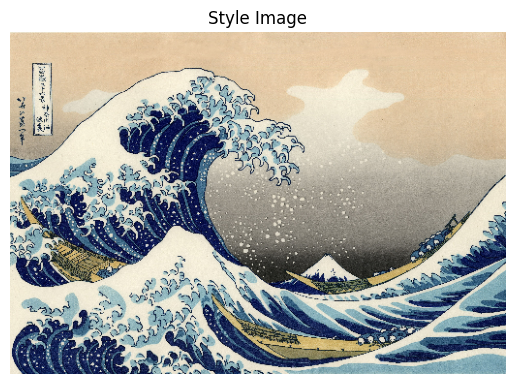

In [30]:
# Show images
show_image(content_image, "Content Image")
show_image(style_image, "Style Image")

In [31]:
# Download and load the TensorFlow Hub model
hub_module = tf.keras.utils.get_file('magenta_arbitrary_image_stylization',
    'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2?tf-hub-format=compressed',
    untar=True)

hub_layer = tf.saved_model.load(hub_module)

In [32]:
# Stylize the image
stylized_image = hub_layer(tf.constant(content_image), tf.constant(style_image))[0]


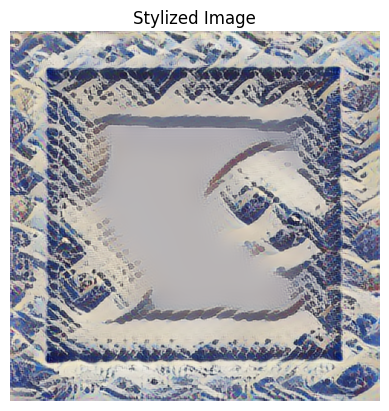

In [33]:
# Show stylized result
show_image(stylized_image, "Stylized Image")